# Hubble Constant Measurement
---
## Author: Petr Smilek

Hubble Constant is unit of the measurement used to explain how quickly is universe expanding. We will verify Hubble's Law from the original data measured by Hubble himself in 1929. <br>

Hubble's Law can be written mathematically by formula:
$$
v = Hr
$$

Where $r$ is distance of galaxies and $v$ is their velocity from the Earth and $H$ is the Hubble Constant and today its value is estimated as $H=74.2$ kilometers per second per megaparsec. That means a galaxy in the distance of $1$ megaparsec is moving away from us at speed $74.2$ kilometers per second due to the expanding space. To put this into perspective that's about $21.8$ milimeters per second per light year. <br>

Two datasets are given; the first contains galaxies whose distances have been estimated from star luminosities in a cluster, the second contains galaxies whose distances have been estimated from radial velocities.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
hubble_data1 = pd.read_csv("nebulae_table1.csv")
hubble_data1

,Object,Photographic Magnitude,Distance,Velocity,Visual Magnitude,Absolute Magnitude
0,S. Mag.,..,0.032,170,1.5,-16.0
1,L. Mag.,..,0.034,290,0.5,17.2
2,N. G. C. 6822,..,0.214,-130,9.0,12.7
3,598,..,0.264,-70,7.0,15.1
4,221,..,0.275,-185,8.8,13.4
5,224,..,0.275,-220,5.0,17.2
6,5457,17,0.450,200,9.9,13.3
7,4736,17.3,0.500,290,8.4,15.1
8,5194,17.3,0.500,270,7.4,16.1
9,4449,17.8,0.630,200,9.5,14.5


Here we have the first dataset. In the beginning we will explore the data. There are 24 objects which are distant galaxies with 5 features. Important features are Distance measured in megaparsecs and Velocity with a unit kilometer per second. <br> <br>
From dataset we will discart three features the Photographic, Visual and Absolute Magnitude because they should not be linearly correlated with Velocity. Let us confirm this with heatmap.

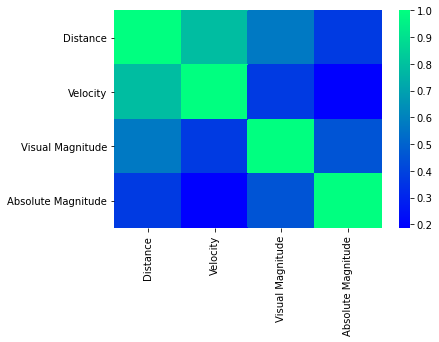

In [3]:
sns.heatmap(hubble_data1.corr(), cmap="winter")

Data shows strong linear correlation between Distance and Velocity so we use linear regression model to fit Velocity as a function of Distance.

In [4]:
# Here is created linear regression model

regr = LinearRegression()

x = hubble_data1["Distance"]
x = np.array(x.values.tolist())

y = hubble_data1["Velocity"]
y = np.array(y.values.tolist())

x = x.reshape(-1, 1)
regr.fit(x, y)

y_pred = regr.predict(x)

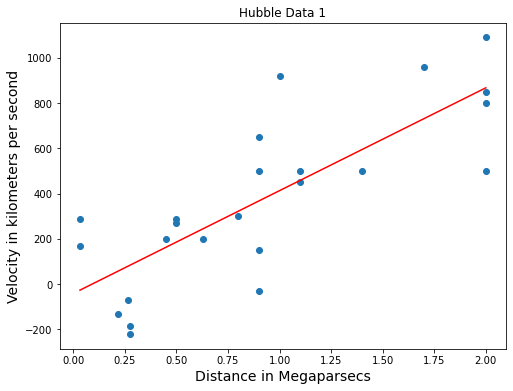

In [13]:
# Plot the first dataset

plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")
plt.xlabel("Distance in Megaparsecs", fontsize=14)
plt.ylabel("Velocity in kilometers per second", fontsize=14)
plt.title("Hubble Data 1")
plt.show()

Now we have straight line which represents the dataset. We need to estimate slope of the line which gives us the rate of expansion of universe.

In [6]:
# Calculate linear coefficient for the first dataset

k = regr.coef_
hubble_const = round(k[0])
print("Calculated Hubble's Constant is", str(hubble_const), "kilometers per second per megaparsecs.")

Calculated Hubble's Constant is 454.0 kilometers per second per megaparsecs.


That's it! From the first dataset linear regression evaluated Hubble's Constant as $H=454.0$ kilometers per second per megaparsec. <br>
Analogically we run this process for the second very similar dataset. 

In [7]:
# Load the second dataset

hubble_data2 = pd.read_csv("nebulae_table2.csv")
hubble_data2

,Object,Distance,Velocity,Visual Magnitude,Absolute Magnitude,Solar Velocity
0,N. G. C. 278,1.52,650,12.0,-13.9,-110
1,584,3.45,1800,10.9,16.8,75
2,936,2.37,1300,11.1,15.7,115
3,1023,0.62,300,10.2,13.8,-10
4,1700,1.16,800,12.5,12.8,220
5,2681,1.42,700,10.7,15.0,-10
6,2683,0.67,400,9.9,14.3,65
7,2841,1.24,600,9.4,16.1,-20
8,3034,0.79,290,9.0,15.5,-105
9,3115,1.00,600,9.5,15.5,105


This dataset contains 21 galaxies and also 5 features. Distances are obtained by a different method than in the first case. We will also use heatmap to see correlation between features. 

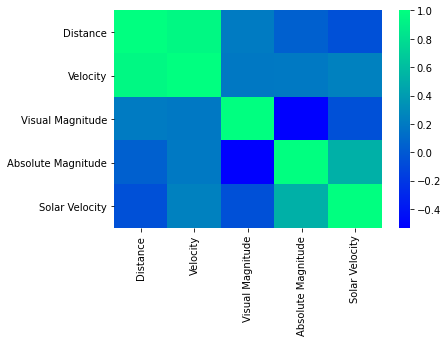

In [8]:
sns.heatmap(hubble_data2.corr(), cmap="winter")

Again strong linear correlation can be seen between Distance and Velocity.

In [9]:
# Here is created linear regression model

x2 = hubble_data2["Distance"]
x2 = np.array(x2.values.tolist())

y2 = hubble_data2["Velocity"]
y2 = np.array(y2.values.tolist())

x2 = x2.reshape(-1, 1)

regr.fit(x2, y2)

y2_pred = regr.predict(x2)

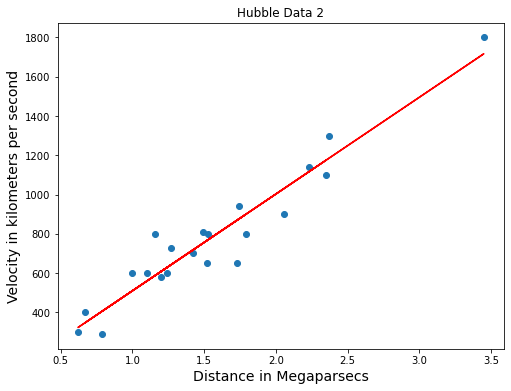

In [14]:
# Plot the second dataset

plt.figure(figsize=(8,6))
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color="red")
plt.xlabel("Distance in Megaparsecs", fontsize=14)
plt.ylabel("Velocity in kilometers per second", fontsize=14)
plt.title("Hubble Data 2")
plt.show()

In [11]:
# Calculate linear coefficient for the second dataset

k2 = regr.coef_
hubble_const2 = round(k2[0])
print("Calculated Hubble's Constant is", str(hubble_const2), "kilometers per second per megaparsecs.")

Calculated Hubble's Constant is 493.0 kilometers per second per megaparsecs.


Value obtained from the second dataset is $H=493.0$ kilometers per second per megaparsec. Because both datasets contain practically the same number of galaxies we will simply conclude Hubble's Constant as aritmetic average. 

In [12]:
# Calculate final value of Hubble's Constant

final_hubble = (hubble_const + hubble_const2)/2
print("Final value of Hubble's Constant taken as average of two given datasets is", str(final_hubble), "kilometers per second per megaparsecs.")

Final value of Hubble's Constant taken as average of two given datasets is 473.5 kilometers per second per megaparsecs.


From Hubble's original data we have obtained the rate of expansion of the universe as $H=473.5$ kilometers per second per megaparsec which is same as Hubble calculated almost century ago. There is big difference between the real value and our predicted value from the data. This is due to the inaccuracies of measurements in the past. <br>
Despite the inaccuracies this scientific paper proved to be historically very significant because for the first time this indicated the universe is not static after all, but perhaps ever expanding.